Project 8 - Neural Networks (SVHN dataset)

Background:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

In this project we use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

Dataset:

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 

Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images  (42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides). File Name is SVHN_single_grey1.h5

About '.h5' file format:

An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data & is designed to store and organize large amounts of data.

This file format is commonly used in fields like medicine, aerospace, physics, engineering, finance, academic research, genomics, astronomy, electronics instruments.


Project Objectives:

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network.

● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
● Data fetching and understand the train/val/test splits 
● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier
● Print the classification metric report
● Implement and apply a deep neural network classifier including (feedforward  neural network, RELU activations)
● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)
● Implement batch normalization for training the neural network
● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics




In [166]:
# importing tensorflow and numpy libraries

import tensorflow as tf
import numpy as np

# h5py package is used to read the hdf file format
import h5py

# we pass 'r' as parameter in below line and read the hdf file
h5data=h5py.File('SVHN_single_grey1.h5','r')

In [167]:
# find what is in this file?

list(h5data)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [168]:
# we can see that file consists of test and train components 
# test data consists of 18000 images of 32*32 pixels

h5data['X_test'].shape

(18000, 32, 32)

In [169]:
# training data consists of 42000 images of 32*32 pixels
h5data['X_train'].shape

(42000, 32, 32)

In [170]:
# a total of 60000 images of 32*32 pixels
h5data['X_val'].shape

(60000, 32, 32)

In [171]:
h5data['y_test'].shape

(18000,)

In [172]:
h5data['y_train'].shape

(42000,)

In [173]:
h5data['y_val'].shape

(60000,)

In [174]:
# take a look at the test data matrix 
h5data['X_test'][:]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]],

       [[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711,
         112.7851],
        [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857,
         107.0137],
        [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,
          95.645 ],
        ...,
        [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,
          62.81  ],
        [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,
          56.1805],
        [150.3207, 149.2068, 144.8051, ...,  42.

In [175]:
X_train=h5data['X_train'][:]
X_test=h5data['X_test'][:]
y_train=h5data['y_train'][:]
y_test=h5data['y_test'][:]

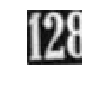

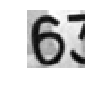

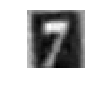

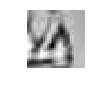

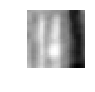

labels for above images: [2 6 7 4 4]


In [176]:
# each image has a label defined:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i],cmap="gray")
    plt.axis('off')
    plt.show()
print('labels for above images: %s' % (y_train[0:5]))

In [177]:
# reshaping the data from 2D to 1D (32*32=1024)

X_train=X_train.reshape(X_train.shape[0],1024)
X_test=X_test.reshape(X_test.shape[0],1024)

X_train=X_train/255.0
X_test=X_test/255.0

print('Training Set', X_train.shape,y_train.shape)
print('Test Set',X_test.shape,y_test.shape)

Training Set (42000, 1024) (42000,)
Test Set (18000, 1024) (18000,)


In [178]:
# taking a look at the test data matrix after re-shaping
X_test[:]

array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
        0.44780627],
       [0.45161137, 0.44769022, 0.44376904, ..., 0.1652502 , 0.18922432,
        0.20883021],
       [0.52256864, 0.52834475, 0.53456783, ..., 0.50266707, 0.5012169 ,
        0.5027937 ],
       ...,
       [0.6517247 , 0.64594865, 0.6385533 , ..., 0.6388313 , 0.6383843 ,
        0.63793725],
       [0.5395208 , 0.5360466 , 0.5286514 , ..., 0.56779647, 0.5599541 ,
        0.55603296],
       [0.11836078, 0.11836078, 0.11836078, ..., 0.13760431, 0.1359851 ,
        0.13368313]], dtype=float32)

In [181]:
# y_test[0] defines a single value i.e. an image of value 1:

y_test[0]

1

In [182]:
# one hot encode outputs
from keras.utils import np_utils
y_train1=np_utils.to_categorical(y_train)
y_test1=np_utils.to_categorical(y_test)

In [183]:
# after encoding the values are represented as array like 
# 1 :- [0,1,0,0,0,0,0,0,0,0]
# 2 :- [0,0,1,0,0,0,0,0,0,0]..... and so on.

y_test1[:]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [184]:
# y_test[0] still represents an image of value 1, after encoding this is how it is defined:
y_test1[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [185]:
# no. of classes
num_classes=y_test1.shape[1]

In [186]:
num_classes

10

In [187]:
# training set has now 42000 images with 1D (32*32=1024)
X_train.shape

(42000, 1024)

In [188]:
# flattening
x_tr=[]
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te=[]
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

In [189]:
# taking a sample
x_tr=x_tr[:5000]
x_te=x_te[:5000]

In [190]:
y_tr=y_train[:5000]
y_te=y_test[:5000]

K-NEAREST NEIGHBOUR

checking accuracy for different k vaues, keeping in view the below points:

K value should be odd as number of classes is even and k should not be in multiples of the number of classes

Should not be too small or too large as a small value of k means that noise will have a higher influence on the result. 
A large value make it computationally expensive.

Below we compute the accuracy for different k values starting from 1 to 31 with a step of 2 i.e. k = 1,3,5,7,9...

In [191]:
# k=1: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=1,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3382


In [192]:
# k=3: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=3,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3302


In [193]:
# k=5: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=5,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3496


In [194]:
# k=7: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=7,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3534


In [195]:
# k=9: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=9,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3636


In [196]:
# k=11: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=11,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3726


In [197]:
# k=13: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=13,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3758


In [198]:
# k=15: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=15,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3792


In [199]:
# k=17: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=17,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3822


In [200]:
# k=19: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=19,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3822


In [201]:
# k=21: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=21,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3814


In [202]:
# k=23: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=23,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3858


In [203]:
# k=25: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=25,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3828


In [204]:
# k=27: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=27,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3846


In [205]:
# k=29: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=29,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3816


In [206]:
# k=31: 

from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=31,weights='uniform', metric='euclidean')
NNH.fit(x_tr,y_tr)
predicted_labels=NNH.predict(x_te)

from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_te,predicted_labels)
MSE=1-ascore
print(ascore)

0.3784


By comparing all the above results, we observe that the maximum accuracy (38.58%) was attained at k =23.

In [207]:
# Training the model for k=23:
NNH=KNeighborsClassifier(n_neighbors=23,weights='uniform',metric='euclidean')
NNH.fit(x_tr,y_tr)
pred=NNH.predict(x_te)

In [208]:
# printing confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_te)

array([[289,  33,  42,  55,  46,  74,  83,  42,  93, 110],
       [ 27, 294,  69,  94,  76,  60,  46,  58,  51,  61],
       [ 12,  18, 191,  39,  15,  25,  18,  48,  23,  30],
       [  7,  23,  36, 121,  18,  60,  30,  29,  31,  23],
       [ 27,  29,  28,  16, 260,  19,  46,  12,  43,  21],
       [ 24,  27,  22,  51,  18, 125,  42,  19,  25,  27],
       [ 34,  18,  16,  20,  42,  57, 165,  19,  74,  36],
       [ 21,  34,  37,  30,  10,  17,  17, 221,  13,  23],
       [ 20,   7,  12,  17,   8,  47,  36,   9, 116,  21],
       [ 42,  20,  34,  18,  19,  38,  33,  19,  52, 147]], dtype=int64)

NEURAL NETWORK MODEL:

In [209]:
tf.keras.backend.clear_session()
# Initializing SEQUENTIAL model
model=tf.keras.models.Sequential()

# Batch normalization:

# Improves gradient flow through the network, allows higher learning rates & reduces the strong dependence on initialization


model.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))

In [210]:
# Adding four hidden layers: with 256,64,64 and 32 neurons respectively.
# There are different types of activation functions: Sigmoid, Tanh, ReLU, Leaky ReLU.
# We are using the activation function 'relu' here as it has the following advantages:
# Very simple and efficient, Have 6x times better convergence than tanh and sigmoid function & is very efficient in computation

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu')) 

# Adding ouput layer, with number of classes or outputs = 10 (between 0 to 9):
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [211]:
# Compiling the model:
from keras.layers import Dropout, MaxPooling2D
# introducing learning rate decay, lr default is 0.01
adam=tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [212]:
# Reviewing the Model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 289,514
Trainable params: 287,466
Non-trainable params: 2,048
_________________________________________________________________


In [213]:
# Training the model. Hyperparameters used: 

# input training data (X_train) and the actual output (y_train1)

# validation_data is the test data (X_test, y_test1)

# epochs: number of iterations = 30

# batch size of 200 means: 48000/200 = 240 batches

# In each epoch/iteration model will run 240 times

model.fit(X_train,y_train1, validation_data=(X_test,y_test1),epochs=30,batch_size=200,verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 5s - loss: 1.5170 - acc: 0.4826 - val_loss: 1.2166 - val_acc: 0.6764
Epoch 2/30
 - 5s - loss: 0.9671 - acc: 0.6975 - val_loss: 0.8697 - val_acc: 0.7342
Epoch 3/30
 - 5s - loss: 0.8046 - acc: 0.7506 - val_loss: 0.8003 - val_acc: 0.7559
Epoch 4/30
 - 5s - loss: 0.7127 - acc: 0.7786 - val_loss: 0.7310 - val_acc: 0.7825
Epoch 5/30
 - 5s - loss: 0.6507 - acc: 0.7986 - val_loss: 0.7005 - val_acc: 0.7923
Epoch 6/30
 - 4s - loss: 0.6027 - acc: 0.8150 - val_loss: 0.7095 - val_acc: 0.7911
Epoch 7/30
 - 5s - loss: 0.5701 - acc: 0.8221 - val_loss: 0.6610 - val_acc: 0.8041
Epoch 8/30
 - 4s - loss: 0.5406 - acc: 0.8308 - val_loss: 0.6819 - val_acc: 0.8020
Epoch 9/30
 - 4s - loss: 0.5182 - acc: 0.8377 - val_loss: 0.6428 - val_acc: 0.8121
Epoch 10/30
 - 5s - loss: 0.4812 - acc: 0.8497 - val_loss: 0.6313 - val_acc: 0.8161
Epoch 11/30
 - 5s - loss: 0.4754 - acc: 0.8512 - val_loss: 0.6324 - val_acc: 0.8207
Epoch 12/30
 - 5s - loss: 0.4436 - 

In [214]:
# Changing the activation function to SIGMOID:

model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) 

# Adding ouput layers, with number of classes or outputs=10:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [215]:
# Compiling the model:
from keras.layers import Dropout, MaxPooling2D
adam=tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [216]:
# Training the model:

model.fit(X_train,y_train1, validation_data=(X_test,y_test1),epochs=30,batch_size=200,verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 7s - loss: 2.2557 - acc: 0.1710 - val_loss: 2.0370 - val_acc: 0.3546
Epoch 2/30
 - 6s - loss: 1.5537 - acc: 0.6336 - val_loss: 1.2022 - val_acc: 0.7589
Epoch 3/30
 - 6s - loss: 1.0981 - acc: 0.7690 - val_loss: 1.0813 - val_acc: 0.7573
Epoch 4/30
 - 5s - loss: 0.8385 - acc: 0.8175 - val_loss: 0.8737 - val_acc: 0.8017
Epoch 5/30
 - 5s - loss: 0.7483 - acc: 0.8308 - val_loss: 0.8387 - val_acc: 0.8054
Epoch 6/30
 - 5s - loss: 0.6593 - acc: 0.8492 - val_loss: 0.7903 - val_acc: 0.8098
Epoch 7/30
 - 5s - loss: 0.5936 - acc: 0.8604 - val_loss: 0.6998 - val_acc: 0.8326
Epoch 8/30
 - 5s - loss: 0.5285 - acc: 0.8726 - val_loss: 0.6657 - val_acc: 0.8327
Epoch 9/30
 - 5s - loss: 0.4733 - acc: 0.8824 - val_loss: 0.6643 - val_acc: 0.8328
Epoch 10/30
 - 6s - loss: 0.4462 - acc: 0.8865 - val_loss: 0.6639 - val_acc: 0.8337
Epoch 11/30
 - 5s - loss: 0.4232 - acc: 0.8911 - val_loss: 0.6722 - val_acc: 0.8289
Epoch 12/30
 - 5s - loss: 0.4073 - 

In [218]:
# Introducing few Dropouts in hidden layers and training the model:

tf.keras.backend.clear_session()

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))

model.add(tf.keras.layers.Dense(256, activation='relu'))
# adding a random dropout value in second hidden layer: 
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
# adding a dropout value in third hidden layer: 
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu')) 

model.add(tf.keras.layers.Dense(10, activation='softmax'))


from keras.layers import Dropout, MaxPooling2D

adam=tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train,y_train1, validation_data=(X_test,y_test1),epochs=30,batch_size=200,verbose=2)


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 6s - loss: 2.0551 - acc: 0.2390 - val_loss: 1.6770 - val_acc: 0.5308
Epoch 2/30
 - 5s - loss: 1.4648 - acc: 0.4991 - val_loss: 1.1508 - val_acc: 0.6625
Epoch 3/30
 - 5s - loss: 1.2539 - acc: 0.5846 - val_loss: 0.9718 - val_acc: 0.7064
Epoch 4/30
 - 5s - loss: 1.1233 - acc: 0.6330 - val_loss: 0.8765 - val_acc: 0.7378
Epoch 5/30
 - 5s - loss: 1.0349 - acc: 0.6631 - val_loss: 0.8121 - val_acc: 0.7553
Epoch 6/30
 - 5s - loss: 0.9497 - acc: 0.6922 - val_loss: 0.7707 - val_acc: 0.7688
Epoch 7/30
 - 5s - loss: 0.8862 - acc: 0.7158 - val_loss: 0.7043 - val_acc: 0.7884
Epoch 8/30
 - 5s - loss: 0.8386 - acc: 0.7347 - val_loss: 0.6777 - val_acc: 0.7962
Epoch 9/30
 - 5s - loss: 0.7877 - acc: 0.7531 - val_loss: 0.6626 - val_acc: 0.7990
Epoch 10/30
 - 5s - loss: 0.7430 - acc: 0.7673 - val_loss: 0.6340 - val_acc: 0.8102
Epoch 11/30
 - 5s - loss: 0.7198 - acc: 0.7745 - val_loss: 0.6484 - val_acc: 0.8044
Epoch 12/30
 - 5s - loss: 0.6918 - 

Observations | Comparisions on K-NN and Deep Learning Model:

1. K-NN model gave very low accuracy percentage i.e. 38.58% and as the sample size increases it requires more computational time 
   compared to the deep learning model

2. Used both 'relu' and 'sigmoid' activation functions, learning rate decay & dropouts to train the deep learning model

3. 'relu' activation function gave slightly better accuracy percentages than the 'sigmoid' activation function as seen above

4. The deep learning model can be more fine tuned by changing diff. hyperparameters like epochs, batch-size etc

5. Dropouts is a regularization method that approximates training a large number of neural networks with different architectures   
   in parallel.During training, some number of layer outputs are randomly ignored or dropped out